1. 首先, 随机确定 K 个初始点作为质心（不必是数据中的点）。
2. 然后将数据集中的每个点分配到一个簇中, 具体来讲, 就是为每个点找到距其最近的质心, 并将其分配该质心所对应的簇. 这一步完成之后, 每个簇的质心更新为该簇所有点的平均值. 
3. 重复上述过程直到数据集中的所有点都距离它所对应的质心最近时结束。

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class KmeansClassifier:
    def __init__(self, k, distance_method = "o", random_select = True, 
                    plot = False):
        self.k = k
        self.distance_method = distance_method
        self.random_select = random_select
        self.plot = plot
        if(distance_method == "o"):
            self._dist = self._euler_dist
        else:
            self._dist = self._manhattan_distance
            
    def _euler_dist(self, x1, x):
        return np.sqrt(np.multiply(x-x1, x-x1).sum())
    
    def _manhattan_distance(self, x1, x):
        return np.abs(x-x1).sum()
    
    def _get_nearest(self, x, center_list, dist):
        dists = []
        for center in center_list:
            dists.append(dist(x, center))
        return dists.index(min(dists))
    
    def _fit(self, x, y, dist, x_center_index_list, center_list):
        xy_map = np.hstack((x, x_center_index_list, x_center_index_list))
        for row in xy_map:
            row[-1] = self._get_nearest(row[:-2], center_list, dist)
        flag = np.all(xy_map[:, -1] == xy_map[:, -2])
        return flag, xy_map[:, -1].reshape(-1, 1), center_list
    
    def _random_center_list(self, x, k):
        center_list = np.zeros((x.shape[1], k))
        for col in range(x.shape[1]):
            col_max = np.max(x[:, col])
            col_min = np.min(x[:, col])
            center_list[col, :] = col_min + (col_max - col_min) * np.random.rand(1, k)
        return center_list.T
    
    def _updata_center_list(self, x, x_center_index_list, center_list):
        new_center_list = []
        for index in range(len(center_list)):
            part_x = x[np.where(
                    x_center_index_list[:, -1] == index)]
            if(0 != part_x.size):
                new_center_list.append(np.mean(part_x, axis = 0))
            else:
                new_center_list.append(np.zeros(part_x.shape[1]))
        return new_center_list
    
    def _plot(self, x, x_center_index_list, center_list):
        '''
        数据绘制，只能绘制二维
        '''
        center_array = np.array(center_list)
        for index in range(len(center_list)):
            part_x = x[np.where(
                    x_center_index_list[:, -1] == index)]
            plt.scatter(part_x[:, 0], part_x[:, 1])
        plt.scatter(center_array[:, 0], center_array[:, 1], marker = "+")
        plt.show()
    
    def fit(self, x, y, center_list = None):
        if not center_list:
            center_list = self._random_center_list(x, self.k)
        x_center_index_list = np.zeros(x.shape[0]).reshape(-1, 1)
        flag = False
        while(True):
            flag, x_center_index_list, center_list = self._fit(x, 
                                        y, self._dist, x_center_index_list, center_list)
            if(flag):
                break
            center_list = self._updata_center_list(x, x_center_index_list,
                                                      center_list)
            if(self.plot):
                self._plot(x, x_center_index_list, center_list)
        return self


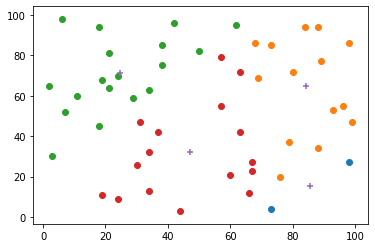

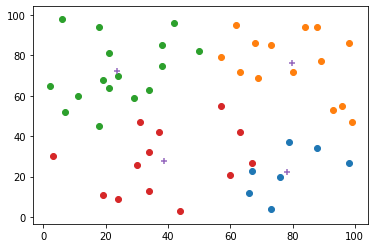

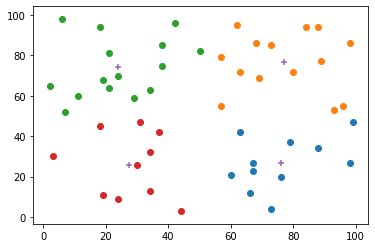

In [37]:
x = np.random.randint(1, 100, (50, 2))
y = np.random.randint(1,4,(10, 1))
kmeans_clf = KmeansClassifier(k = 4, plot=True)
kmeans_clf.fit(x, y)